In [1]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
base = automap_base()
base.prepare(engine)

In [4]:
base.classes

In [5]:
base.classes.keys()

['measurement', 'station']

In [6]:
measurement = base.classes.measurement
station = base.classes.station
session = Session(engine)

## Precipitation Analysis

In [7]:
# Find the most recent date in the dataset.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [8]:
recent_datetwo = session.query(func.max(measurement.date)).first()
recent_datetwo

('2017-08-23',)

In [9]:
# Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.
last_year = dt.date(2017,8,23)-dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [10]:
# Select only the "date" and "prcp" values.
question_two = session.query(measurement.date, measurement.prcp).filter(measurement.date > last_year).all()
question_two

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [11]:
# Load the query results into a Pandas DataFrame. Explicitly set the column names.
date_pcp = pd.DataFrame(question_two)
date_pcp
#line plot later

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [12]:
# Sort the DataFrame values by "date".
date_sort = date_pcp.sort_values("date")
date_sort

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


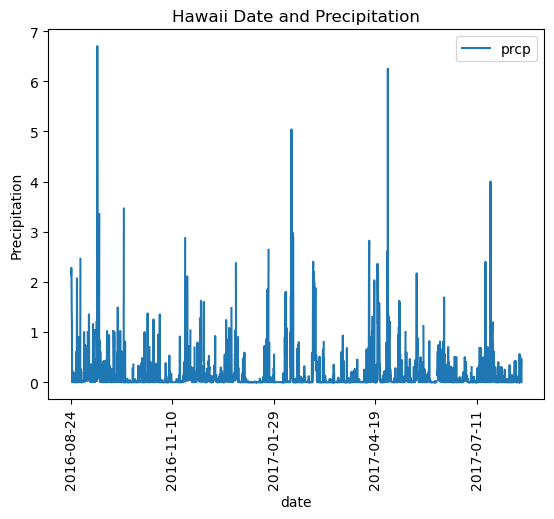

In [13]:
# Plot the results by using the DataFrame plot method
# plt.plot(date_sort["date"], date_sort["prcp"]) #matplotlib method 1
# x_axis = date_sort["date"]
# y_axis = date_sort["prcp"]
# plt.plot(x_axis, y_axis) #matplotlib method 2
date_sort.plot("date", "prcp")
plt.xticks(rotation=90)
plt.ylabel("Precipitation")
plt.title("Hawaii Date and Precipitation")
plt.show()

In [14]:
# Use Pandas to print the summary statistics for the precipitation data.
date_sort.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset.
total_stations = session.query(station.station).count()
print(f"There are {total_stations} total stations in Hawaii")

There are 9 total stations in Hawaii


In [16]:
# Design a query to find the most-active stations (that is, the stations that have the most rows). 
# To do so, complete the following steps:
# List the stations and observation counts in descending order.
# HINT: You’ll need to use the func.count function in your query.
# Answer the following question: which station id has the greatest number of observations?
active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
print(active_station)
print(f"The station ID of {active_station[0][0]} has the greatest number of observations.")

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
The station ID of USC00519281 has the greatest number of observations.


In [17]:
# Design a query that calculates the lowest, highest, and average temperatures that filters on 
# the most-active station id found in the previous query.
most_active_stat = session.query(measurement.station, func.min(measurement.tobs),
                                func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == active_station[0][0]).first()
most_active_stat

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [18]:
# Design a query to get the previous 12 months of temperature observation (TOBS) data. 
# Filter by the station that has the greatest number of observations.
# Query the previous 12 months of TOBS data for that station.
most_active_data = session.query(measurement.tobs).\
    filter(measurement.station == active_station[0][0]).\
    filter(measurement.date > last_year).all()
most_active_data

[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


In [19]:
most_active = pd.DataFrame(most_active_data)
most_active

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


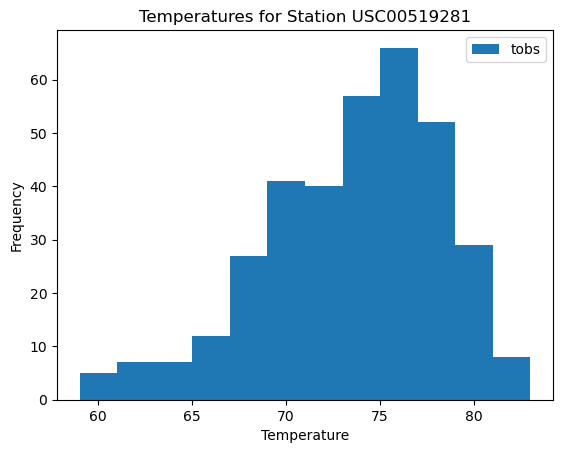

In [20]:
# Plot the results as a histogram with bins=12
most_active.plot.hist(bins = 12)
plt.xlabel("Temperature")
plt.title("Temperatures for Station USC00519281")
plt.show()

In [21]:
# Close your session.
session.close()